In [2]:
wd <- dirname(dirname(getwd()))
source(paste0(wd,"/mission_control/treasure_map.R"))
source(paste0(wd,"/mission_control/helpers/figures/figure5_themes.R"))

library(tidyverse)
library(gridExtra)
library(ggpubr)

#### 0 - Read Subplots

In [2]:
#FIG_DIR

In [4]:
#a <- readRDS(paste0(FIG_DIR, "tmp/figure5_a.Rds"))
#b <- readRDS(paste0(FIG_DIR, "pred_study_plots.Rds"))
c <- readRDS(paste0(FIG_DIR, "figure5_c.Rds"))
d <- readRDS(paste0(FIG_DIR, "figure5_d_new.Rds"))
e <- readRDS(paste0(FIG_DIR, "figure5_d.Rds"))
#ef <- readRDS(paste0(FIG_DIR, "figure5_ef.Rds"))
#g <- readRDS(paste0(FIG_DIR, "figure5_g.Rds"))$exs

#### get dressed

In [5]:
get_dressed <- function(go, hjust = .5, size = 25, vjust = 4, m = 1){
    go + theme(plot.title = element_text(hjust = hjust, size = size, vjust = vjust), plot.margin = unit(rep(m,4), "cm"))
}
annote <- function( i, lab ) annotate_figure( i, fig.lab = lab, fig.lab.size = 35, fig.lab.face = "bold")
left_title <- theme(plot.title = element_text(hjust = 0))

### 1 - Top Panel

In [5]:
fig_b <- annote(get_dressed(b$combined$figure_5b), "B")

In [6]:
top_panel <- arrangeGrob( ggplot() + theme_void() , fig_b, layout_matrix = rbind(c(1,2,2),c(1,2,2)))

In [7]:
top <- (
    get_dressed(as_ggplot(top_panel), m = 1, size = 40, vjust = 2) 
        + ggtitle("HMF Cross-validated XGBoost models")
)

### 2 - Middle Panel

In [8]:
fig_c <- annote(get_dressed(as_ggplot(c$abc), size = 35), "C")
fig_d <- annote(get_dressed(as_ggplot(d$response), size = 35), "D")
middle_panel <- as_ggplot(arrangeGrob(fig_c, fig_d, layout_matrix = rbind(c(rep(1,5), rep(2,4)))))

In [9]:
middle <- (
    get_dressed(middle_panel, m = 1, size = 40, vjust = 2) 
        + ggtitle("Patients Stratified by Response Groups")
)

### 3 - Bottom panel

In [10]:
fig_e <- annote(get_dressed( ef$e_main,  "Overall survival by response strata", m = .5, size = 30 ), "A")
fig_f <- annote(get_dressed( as_ggplot(ef$low),  "Overall survival by response strata", m = .5, size = 30 ), "B")
#fig_g <- annote(get_dressed( g$ll,  "Overall survival by response strata", m = .5, size = 30 ), "G")
fig_g <- annote(g$ll, "C")
lower_panel <- as_ggplot(arrangeGrob( fig_e, fig_f, fig_g, ncol = 3))
lower <- get_dressed(lower_panel, m = 1, size = 40) + ggtitle("HMF response vs survival and shapley example")

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message in unit(rep(just$hjust, n), "npc"):
“NAs introduced by coercion”Warning message in validDetails.text(x):
“NAs introduced by coercion”

### 3 - Put it together

In [11]:
figure5 <- as_ggplot(arrangeGrob( top, middle, ncol = 1))
figure5_supp <- as_ggplot(arrangeGrob( lower, ncol = 1))

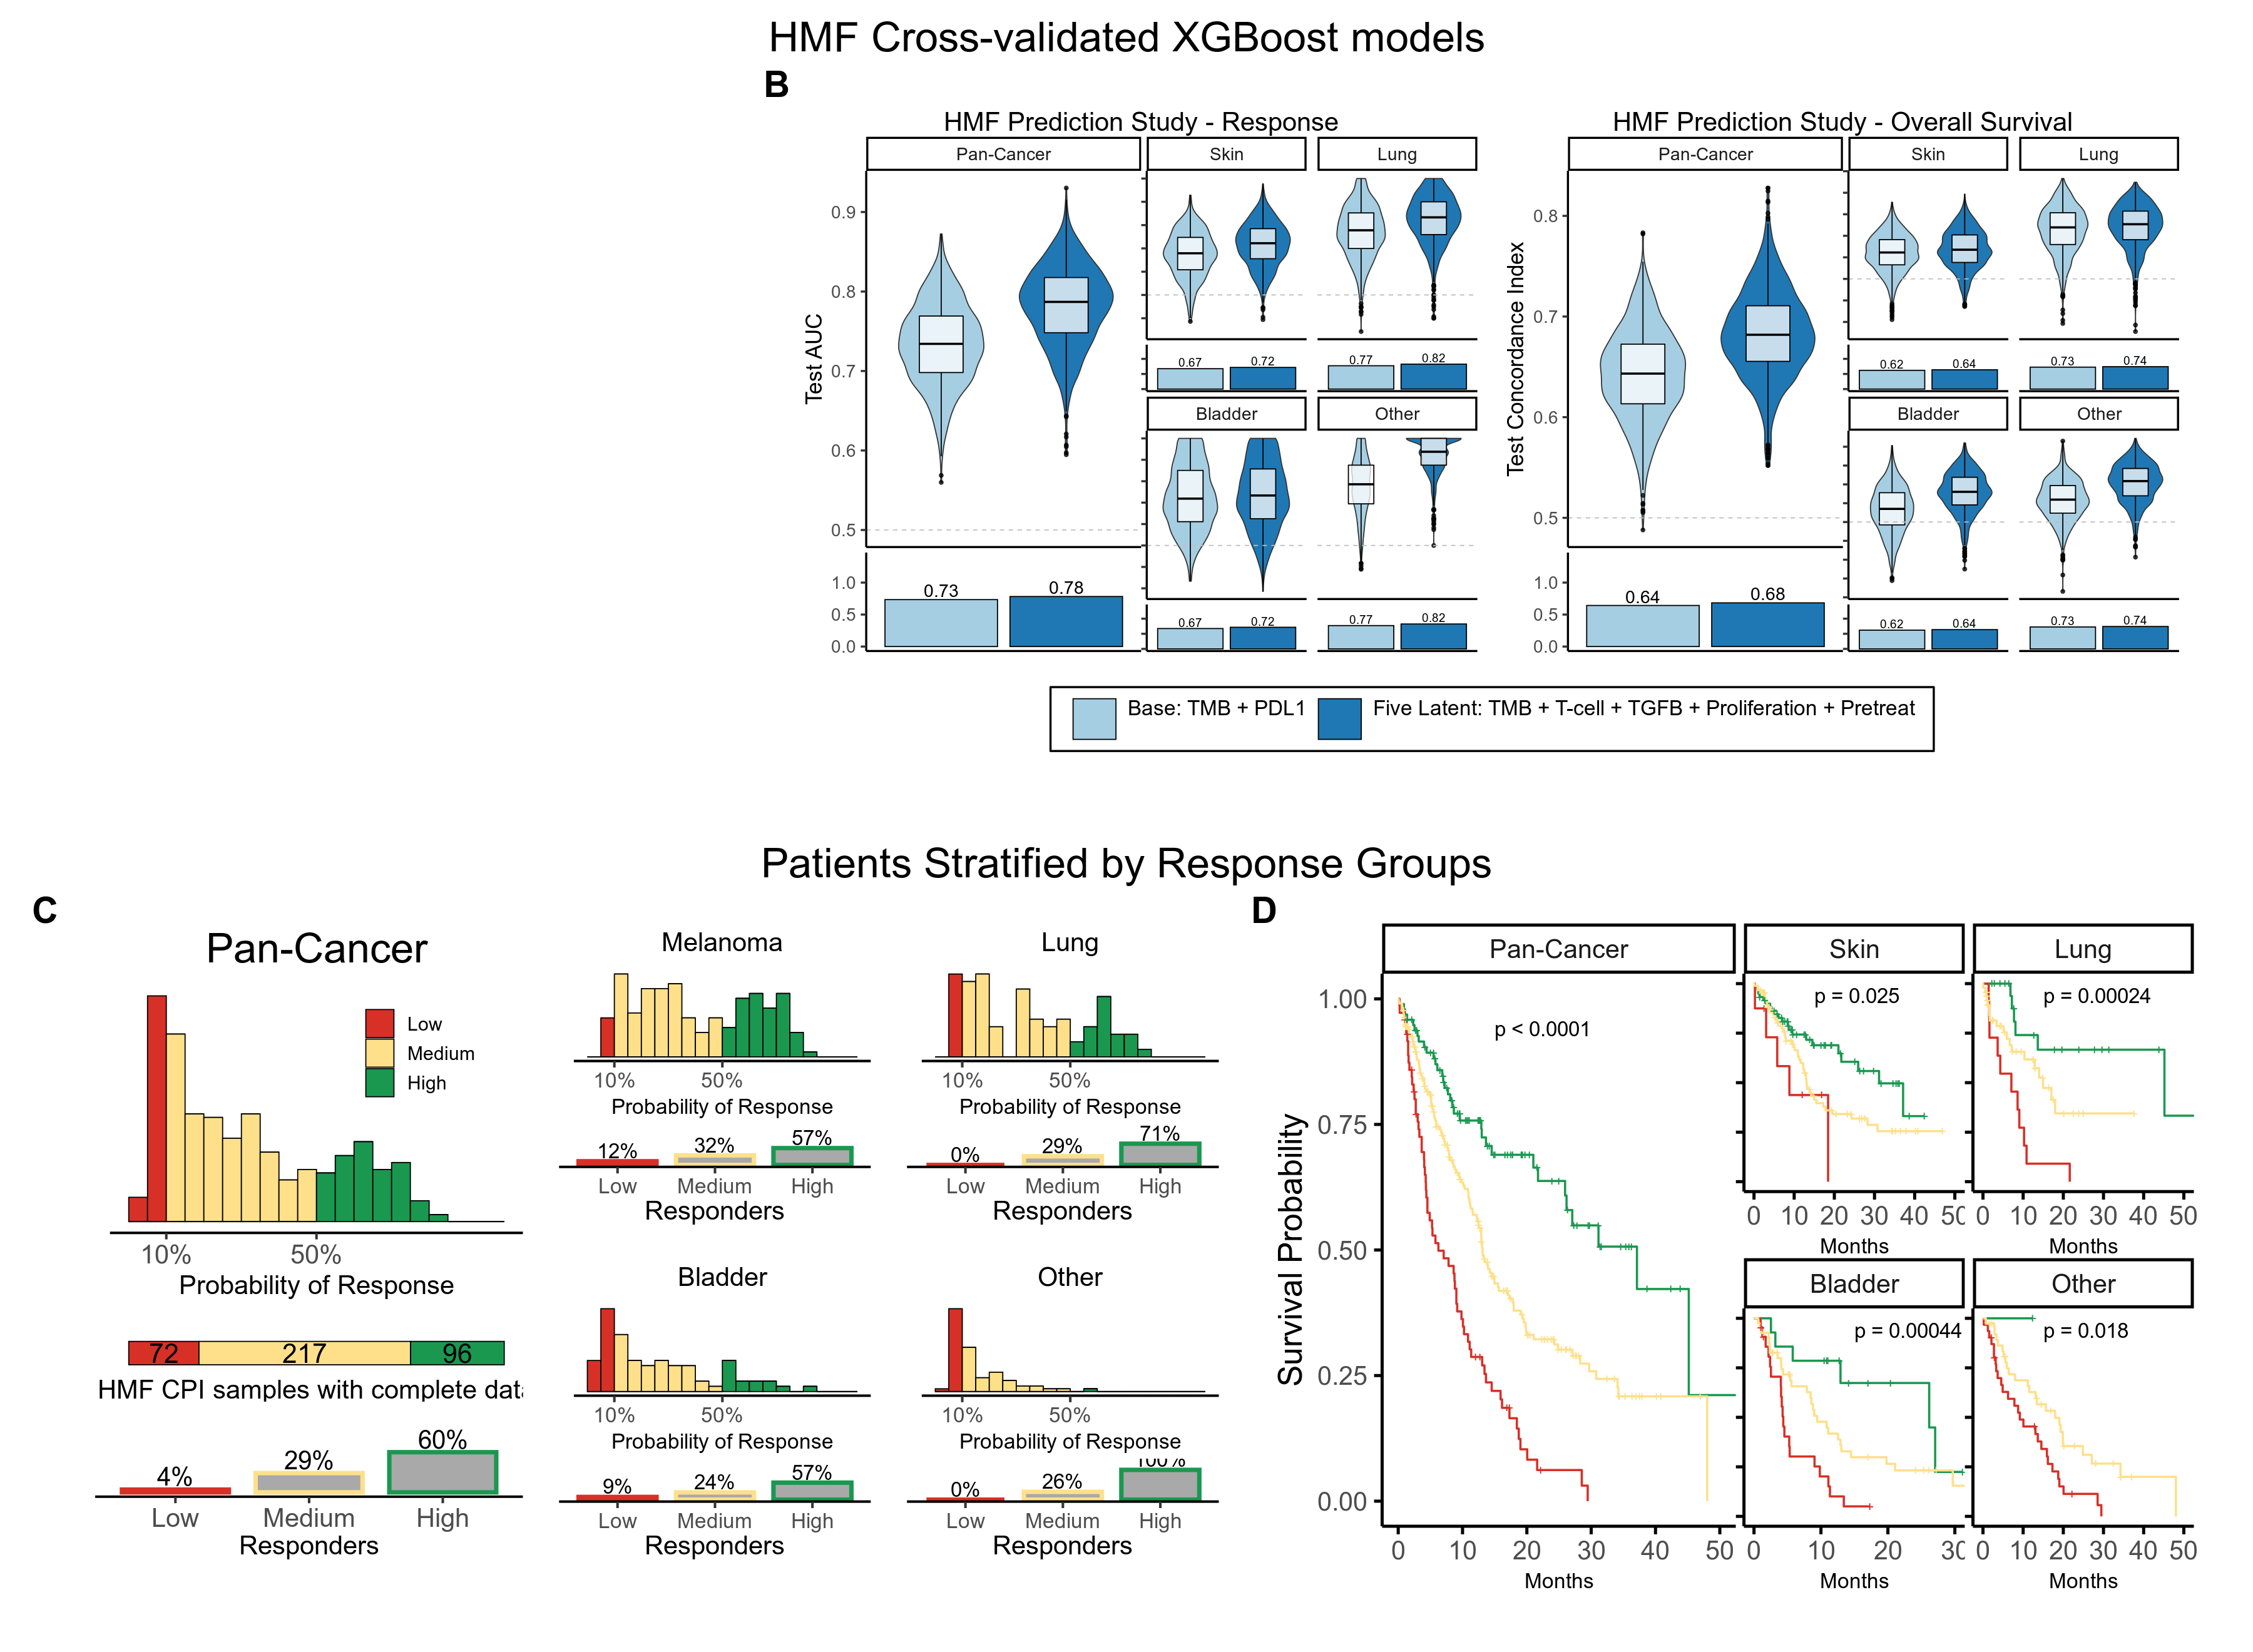

In [12]:
options(repr.plot.width = 30, repr.plot.height= 22, resolution = 200)
figure5
ggsave(file = paste0(FIG_FINAL_DIR, "figure5.png"), width = 30, height = 22)

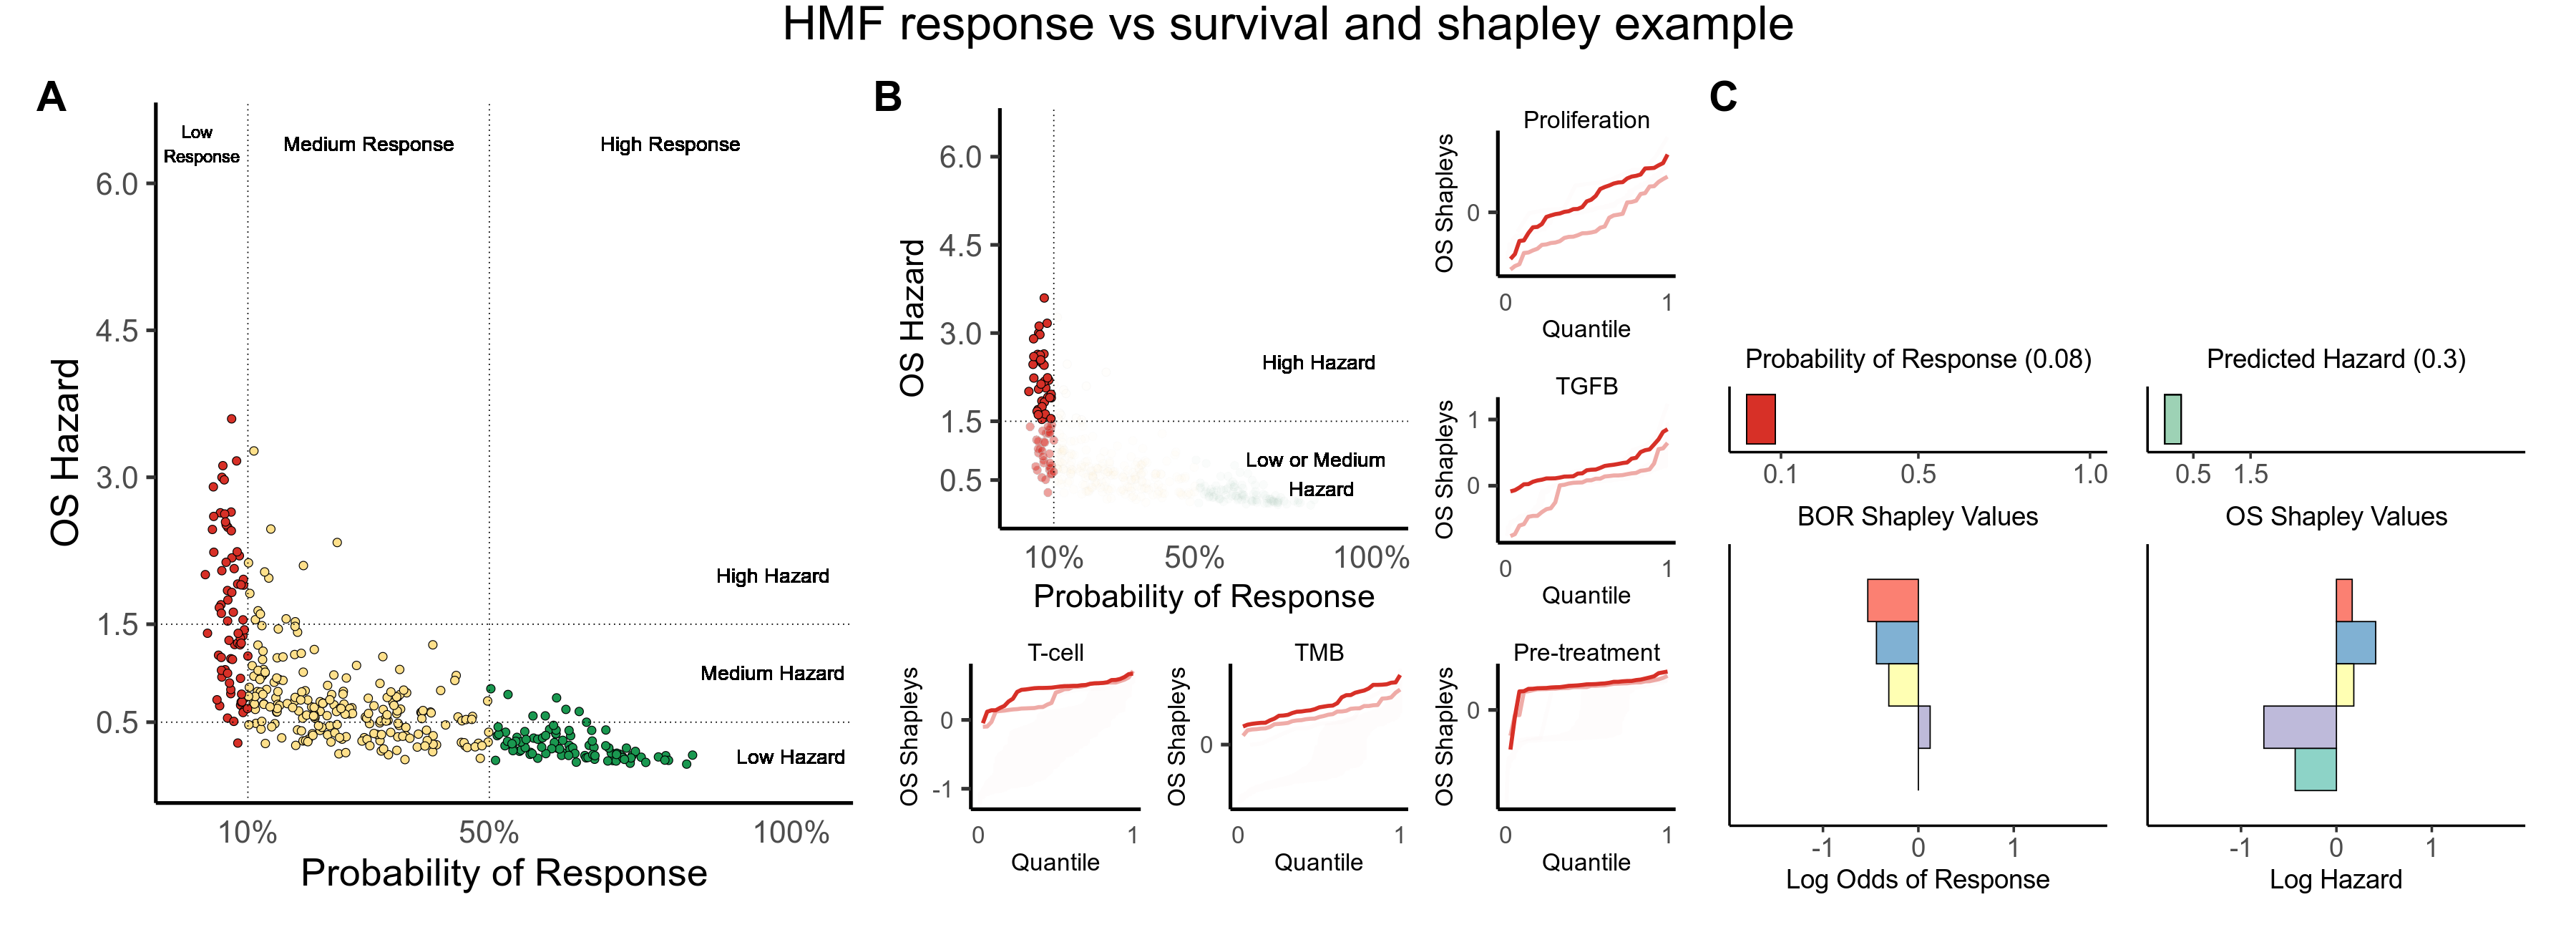

In [13]:
options(repr.plot.width = 30, repr.plot.height= 11, resolution = 200)
figure5_supp
ggsave(file = paste0(FIG_FINAL_DIR, "figure5_supp.png"), width = 30, height = 11)